## Step 2: Scouting Research Candidates

Decision whether or not to pursue a research item

In [1]:
import sys
sys.path.append('../')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s'
)
logger = logging.getLogger(__name__)

from components.agents.scout_agent import scout_batch

from data.content_saver import ContentSaver
content_saver = ContentSaver(base_path="../data")

2025-12-27 17:19:47,774 - data.content_saver - INFO - Loaded content index with 233 entries


Load Research Items

In [2]:
df = pd.read_csv("../data/research_items.csv")

provider_counts = df['provider'].value_counts()
print("Absolute counts:")
print(provider_counts)
print("\nNormalized (proportions):")
print(df['provider'].value_counts(normalize=True))

Absolute counts:
provider
arxiv        3126
openai        447
anthropic     377
exa           252
Name: count, dtype: int64

Normalized (proportions):
provider
arxiv        0.743931
openai       0.106378
anthropic    0.089719
exa          0.059971
Name: proportion, dtype: float64


In [3]:
df.iloc[2:6]

,focus_area,provider,url,title,source,published,relevance,date_added,scout_decision,scout_confidence,scout_reasoning,scouted_at
2,reasoning_agent,openai,https://openai.com/index/gpt-5-2-codex,Introducing GPT-5.2-Codex,OpenAI blog,2025-12-18,Official release of an agentic coding model em...,2025-12-24,pursue,0.93,"This is an official OpenAI release (credible, ...",2025-12-26T23:51:12.380414
3,reasoning_agent,openai,https://openai.com/index/introducing-gpt-5-2/,Introducing GPT-5.2,OpenAI blog,2025-12-11,Details GPT-5.2 “Thinking/Pro” modes and API r...,2025-12-24,pursue,0.93,This is a recent (2025-12-11) primary-source r...,2025-12-26T23:51:12.380718
4,reasoning_agent,openai,https://blog.google/products/gemini/gemini-3/,Introducing Gemini 3: our most intelligent mod...,Google Blog (Gemini/DeepMind),2025-11-18,Announces Gemini 3 with “thinking”/Deep Think ...,2025-12-24,pursue,0.86,"This is a very recent, high-signal primary-sou...",2025-12-26T23:51:12.380975
5,reasoning_agent,openai,https://www.anthropic.com/engineering/equippin...,Equipping agents for the real world with Agent...,Anthropic Engineering,2025-10-16 (updated 2025-12-18),Introduces (and updates) a modular skills syst...,2025-12-24,pursue,0.90,This is directly relevant to our core needs (t...,2025-12-26T23:51:12.381219


Select items that have not yet been looked at

In [4]:
pending = df[df.get("scout_decision").isna()] if "scout_decision" in df.columns else df

In [5]:
# Collect scout items
items_to_scout = pending.to_dict("records")
print(f"Number of items to scout: {len(items_to_scout)}")

Number of items to scout: 2645


Run Scouting

In [ ]:
decisions = await scout_batch(items_to_scout)

Update DataFrame

In [9]:
for i, (idx, row) in enumerate(pending.iterrows()):
    df.loc[idx, "scout_decision"] = "pursue" if decisions[i].pursue else "discard"
    df.loc[idx, "scout_confidence"] = decisions[i].confidence
    df.loc[idx, "scout_reasoning"] = decisions[i].reasoning
    df.loc[idx, "scouted_at"] = datetime.now().isoformat()

In [15]:
df['scout_decision'].value_counts(dropna=False)

scout_decision
pursue     1169
discard     388
Name: count, dtype: int64

Save back to DF

In [16]:
df.to_csv("../data/research_items.csv", index=False)

Check some pursue vs discard items

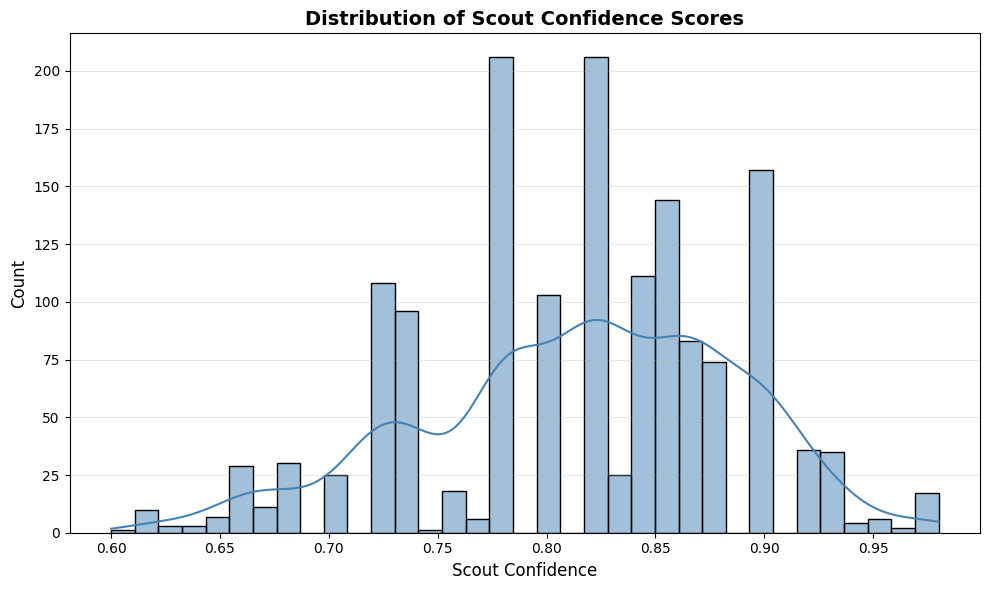

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df['scout_confidence'], bins=35, kde=True, ax=ax, color='steelblue')
ax.set_xlabel('Scout Confidence', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Distribution of Scout Confidence Scores', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [18]:
df[df['scout_confidence'] <= 0.625].head(3)

,focus_area,provider,url,title,source,published,relevance,date_added,scout_decision,scout_confidence,scout_reasoning,scouted_at
374,arxiv,arxiv,https://arxiv.org/abs/2512.20457v1,When Natural Strategies Meet Fuzziness and Res...,arXiv,2025-12-23,Summary: In formal strategic reasoning for Mul...,2025-12-25,pursue,0.62,This is directly in the multi-agent strategic ...,2025-12-26T23:51:12.456143
470,arxiv,arxiv,https://arxiv.org/abs/2512.20094v1,Jensen-Shannon Divergence Message-Passing for ...,arXiv,2025-12-23,"Summary: In this paper, we investigate how the...",2025-12-25,pursue,0.60,This is directly about learning embeddings on ...,2025-12-26T23:51:12.471280
530,arxiv,arxiv,https://arxiv.org/abs/2512.20029v1,$\text{H}^2$em: Learning Hierarchical Hyperbol...,arXiv,2025-12-23,Summary: Compositional zero-shot learning (CZS...,2025-12-25,pursue,0.62,Although framed around compositional zero-shot...,2025-12-26T23:51:12.480877


In [19]:
df[df['scout_decision'] == 'pursue'].iloc[5:10]

,focus_area,provider,url,title,source,published,relevance,date_added,scout_decision,scout_confidence,scout_reasoning,scouted_at
7,reasoning_agent,openai,https://simonwillison.net/2025/Dec/19/agent-sk...,Agent Skills,Simon Willison’s blog,2025-12-19,Technical commentary highlighting implementati...,2025-12-24,pursue,0.82,This is directly relevant to agent infrastruct...,2025-12-26T23:51:12.381906
8,reasoning_agent,openai,https://arxiv.org/abs/2512.02008,The Art of Scaling Test-Time Compute for Large...,arXiv,2025-12-01,Large-scale empirical comparison of test-time ...,2025-12-24,pursue,0.90,This is directly aligned with our need to impr...,2025-12-26T23:51:12.382342
9,reasoning_agent,openai,https://arxiv.org/abs/2512.02304,When Does Verification Pay Off? A Closer Look ...,arXiv,2025-12-02,Systematic solver–verifier study (including cr...,2025-12-24,pursue,0.88,This is directly relevant to improving reliabi...,2025-12-26T23:51:12.382596
10,reasoning_agent,openai,https://arxiv.org/abs/2512.10313,EpiPlanAgent: Agentic Automated Epidemic Respo...,arXiv,2025-12-11 (v2 2025-12-12),Multi-agent LLM workflow for real planning/val...,2025-12-24,pursue,0.80,Even though the application domain is epidemic...,2025-12-26T23:51:12.382985
11,reasoning_agent,openai,https://arxiv.org/abs/2512.17912,Graph-O1 : Monte Carlo Tree Search with Reinfo...,arXiv,2025-11-26,Agentic GraphRAG approach combining MCTS + RL ...,2025-12-24,pursue,0.82,This is directly aligned with our “Reasoning &...,2025-12-26T23:51:12.383250


In [20]:
df[df['scout_decision'] == 'discard'].iloc[5:10]

,focus_area,provider,url,title,source,published,relevance,date_added,scout_decision,scout_confidence,scout_reasoning,scouted_at
140,agents_and_finance,anthropic,https://www.weforum.org/stories/2024/12/agenti...,How Agentic AI will transform financial services,World Economic Forum,December 2024,WEF analysis on agentic AI transforming financ...,2025-12-24,discard,0.80,This looks like a high-level thought-leadershi...,2025-12-26T23:51:12.414812
154,agents_and_finance,anthropic,https://www.v7labs.com/blog/ai-for-private-equ...,5 Applications of AI in Venture Capital and Pr...,V7 Labs,recent,Survey shows 82% of PE/VC firms using AI in Q4...,2025-12-24,discard,0.82,This looks like a high-level “applications” ro...,2025-12-26T23:51:12.417244
155,agents_and_finance,anthropic,https://www.affinity.co/guides/vc-ai-tools,10 AI Tools for Venture Capital Firms in 2025,Affinity,2025,"Guide to AI-powered deal sourcing, relationshi...",2025-12-24,discard,0.72,"This looks like a vendor-authored, top-10 styl...",2025-12-26T23:51:12.417419
159,agents_and_finance,anthropic,https://www.highradius.com/resources/Blog/agen...,How Agentic AI Enhances Financial Reporting: 5...,HighRadius,April 2025,Practical guide on AI agents for journal entry...,2025-12-24,discard,0.78,While the topic (agentic AI for financial repo...,2025-12-26T23:51:12.418105
165,agents_and_finance,anthropic,https://learn.deeplearning.ai/courses/multi-ai...,Multi AI Agent Systems with CrewAI - Financial...,DeepLearning.AI,May 2024,Educational course on building multi-agent fin...,2025-12-24,discard,0.78,While multi-agent financial analysis is direct...,2025-12-26T23:51:12.419227
